In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import re
import time
import json

from scipy import stats

from sklearn.dummy import DummyRegressor

from sklearn.model_selection import (train_test_split,
                                     GridSearchCV,
                                     cross_val_score)

from sklearn.preprocessing import (StandardScaler,
                                   OneHotEncoder,
                                   PolynomialFeatures)

from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             r2_score,make_scorer)

from sklearn.linear_model import (LinearRegression,
                                  Ridge,Lasso,
                                  LogisticRegression)

from sklearn.utils import shuffle

!pip install shap
import shap

!pip install lightgbm
import lightgbm as lgb

!pip install category_encoders
from category_encoders import MEstimateEncoder

!pip install missingno
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# 1. Preprocessing <a class="anchor" id="first-bullet"></a>

In [164]:
df = pd.read_csv('cv_programmers.csv', encoding="CP1251")

In [165]:
df.head()

,Unnamed: 0,id,abilympics_inspection_status,abilympics_participation,worldskills_inspection_status,state_region_code,regionNameTerm,position_name,date_create,date_modify,home_city_code,education,academic_degree,drive_license,code_country,nark_inspection_status,nark_certificate,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,id_candidate,other_certificates,retraining_capability,other_info,id_user,publication_period,rf_citizen,status,visibility,code_external_system,deleted,fullness_rate,professionList,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName
0,44,02f70fc0-5142-11ec-b050-1b29d3b53cbb,UNKNOWN,False,NOT_APPLICABLE,6100000000000,NaN,Техник-программист,2021-11-29T21:27:30+0300,2021-11-29T21:29:16+0300,6100000100000,Среднее-профессиональное,NaN,[],RU,NOT_APPLICABLE,NaN,2021-11-30T10:50:53+0300,"Сменный-график,Неполный-рабочий-день,Полный-ра...",2,30000,NaN,NaN,Полная-занятость,Готов-к-командировкам,c306aef0-19cc-11eb-a336-736ab11edb0c,<p>Присвоен-классный-чин-государственной-гражд...,Готов-к-переобучению,NaN,c60a1390-249e-11e5-b38b-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,79,"[{""code_profession"": ""270999"", ""code_professio...","[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Чте...",[],[],"Ростовская-область,-г.-Ростов-на-Дону"
1,54,02f6df20-3b3d-11ec-a60c-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,7800000000000,NaN,Программист,2021-11-01T20:56:17+0300,2021-11-28T19:12:25+0300,7800000000000,Среднее,NaN,[],RU,NOT_APPLICABLE,NaN,2021-11-28T19:18:18+0300,"Гибкий-график,Сменный-график,Полный-рабочий-день",14,30000,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,70f11d60-3b38-11ec-a077-7bf9d8e248ac,NaN,Готов-к-переобучению,NaN,048b3b20-8e30-11eb-9809-5d9e90ab9534,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,69,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""graduate_year"": 1995, ""institute_name"": ""Шк...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...",[],[],г.-Санкт-Петербург
2,294,02efefb0-0e43-11ed-81ab-7fb917d16256,UNKNOWN,False,NOT_APPLICABLE,5600000000000,NaN,Программист,2022-07-28T10:00:49+0300,2022-07-29T10:30:56+0300,5600000200000,Среднее,NaN,[],RU,NOT_APPLICABLE,NaN,2022-07-29T14:04:11+0300,"Гибкий-график,Полный-рабочий-день,Вахтовый-метод",0,25000,NaN,NaN,Удаленная,Не-готов-к-командировкам,6fef4e90-028a-11ed-8c5e-add87b92f9ec,NaN,Готов-к-переобучению,NaN,dbeca090-18c5-11e5-b612-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,73,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""graduate_year"": 2020, ""institute_name"": ""мб...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Французский"", ""level"": ""Ба...","[{""hard_skill_name"": ""стрессоустойчивость"", ""o...","[{""owner_id"": ""02efefb0-0e43-11ed-81ab-7fb917d...","Оренбургская-область,-г.-Медногорск"
3,415,02ec5b90-658a-11ed-8193-e57b87a63fa7,UNKNOWN,False,NOT_APPLICABLE,1600000000000,NaN,Программист,2022-11-16T11:38:14+0300,2022-11-16T11:38:14+0300,1600000100000,NaN,NaN,[],RU,NOT_APPLICABLE,NaN,2022-11-17T09:21:38+0300,Полный-рабочий-день,0,39157,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,908502f0-7e12-11ec-b77d-956717074877,NaN,Готов-к-переобучению,NaN,2f73dc30-23f5-11e5-b38b-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,53,"[{""code_profession"": ""258573"", ""code_professio...",[],"[{""owner_id"": ""02ec5b90-658a-11ed-8193-e57b87a...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],[],[],[],"Республика-Т

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     425 non-null    int64  
 1   id                             425 non-null    object 
 2   abilympics_inspection_status   425 non-null    object 
 3   abilympics_participation       425 non-null    bool   
 4   worldskills_inspection_status  425 non-null    object 
 5   state_region_code              425 non-null    int64  
 6   regionNameTerm                 0 non-null      float64
 7   position_name                  425 non-null    object 
 8   date_create                    425 non-null    object 
 9   date_modify                    425 non-null    object 
 10  home_city_code                 425 non-null    int64  
 11  education                      367 non-null    object 
 12  academic_degree                0 non-null      flo

In [167]:
df.nunique()

Unnamed: 0                       425
id                               425
abilympics_inspection_status       1
abilympics_participation           2
worldskills_inspection_status      2
state_region_code                 70
regionNameTerm                     0
position_name                    123
date_create                      425
date_modify                      425
home_city_code                   259
education                          4
academic_degree                    0
drive_license                      4
code_country                       2
nark_inspection_status             3
nark_certificate                   1
published_date                   421
schedule_type                     45
experience                        29
salary                            55
professional_skills               27
add_skills                        20
busy_type                          5
business_trip                      2
id_candidate                     424
other_certificates                24
r

In [168]:
df_first = df.copy()

In [169]:
unique_counts = df.nunique()
columns_to_drop = unique_counts[unique_counts <= 1].index
df = df.drop(columns_to_drop, axis=1)

In [170]:
df.head()

,Unnamed: 0,id,abilympics_participation,worldskills_inspection_status,state_region_code,position_name,date_create,date_modify,home_city_code,education,drive_license,code_country,nark_inspection_status,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,id_candidate,other_certificates,retraining_capability,other_info,id_user,rf_citizen,status,fullness_rate,professionList,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName
0,44,02f70fc0-5142-11ec-b050-1b29d3b53cbb,False,NOT_APPLICABLE,6100000000000,Техник-программист,2021-11-29T21:27:30+0300,2021-11-29T21:29:16+0300,6100000100000,Среднее-профессиональное,[],RU,NOT_APPLICABLE,2021-11-30T10:50:53+0300,"Сменный-график,Неполный-рабочий-день,Полный-ра...",2,30000,NaN,NaN,Полная-занятость,Готов-к-командировкам,c306aef0-19cc-11eb-a336-736ab11edb0c,<p>Присвоен-классный-чин-государственной-гражд...,Готов-к-переобучению,NaN,c60a1390-249e-11e5-b38b-1ff705945672,True,ACCEPTED,79,"[{""code_profession"": ""270999"", ""code_professio...","[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Чте...",[],[],"Ростовская-область,-г.-Ростов-на-Дону"
1,54,02f6df20-3b3d-11ec-a60c-839f0d9a4379,False,NOT_APPLICABLE,7800000000000,Программист,2021-11-01T20:56:17+0300,2021-11-28T19:12:25+0300,7800000000000,Среднее,[],RU,NOT_APPLICABLE,2021-11-28T19:18:18+0300,"Гибкий-график,Сменный-график,Полный-рабочий-день",14,30000,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,70f11d60-3b38-11ec-a077-7bf9d8e248ac,NaN,Готов-к-переобучению,NaN,048b3b20-8e30-11eb-9809-5d9e90ab9534,True,ACCEPTED,69,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""graduate_year"": 1995, ""institute_name"": ""Шк...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...",[],[],г.-Санкт-Петербург
2,294,02efefb0-0e43-11ed-81ab-7fb917d16256,False,NOT_APPLICABLE,5600000000000,Программист,2022-07-28T10:00:49+0300,2022-07-29T10:30:56+0300,5600000200000,Среднее,[],RU,NOT_APPLICABLE,2022-07-29T14:04:11+0300,"Гибкий-график,Полный-рабочий-день,Вахтовый-метод",0,25000,NaN,NaN,Удаленная,Не-готов-к-командировкам,6fef4e90-028a-11ed-8c5e-add87b92f9ec,NaN,Готов-к-переобучению,NaN,dbeca090-18c5-11e5-b612-1ff705945672,True,ACCEPTED,73,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""graduate_year"": 2020, ""institute_name"": ""мб...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Французский"", ""level"": ""Ба...","[{""hard_skill_name"": ""стрессоустойчивость"", ""o...","[{""owner_id"": ""02efefb0-0e43-11ed-81ab-7fb917d...","Оренбургская-область,-г.-Медногорск"
3,415,02ec5b90-658a-11ed-8193-e57b87a63fa7,False,NOT_APPLICABLE,1600000000000,Программист,2022-11-16T11:38:14+0300,2022-11-16T11:38:14+0300,1600000100000,NaN,[],RU,NOT_APPLICABLE,2022-11-17T09:21:38+0300,Полный-рабочий-день,0,39157,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,908502f0-7e12-11ec-b77d-956717074877,NaN,Готов-к-переобучению,NaN,2f73dc30-23f5-11e5-b38b-1ff705945672,True,ACCEPTED,53,"[{""code_profession"": ""258573"", ""code_professio...",[],"[{""owner_id"": ""02ec5b90-658a-11ed-8193-e57b87a...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],[],[],[],"Республика-Татарстан,-г.-Казань"
4,689,029ebe60-e0d0-11ec-a466-839f0d9a4379,False,NOT_APPLICABLE,5700000000000,Техник-программист,2022-05-31T13:54:14+0300,2022-05-31T13:56:04+0300,5701700100000,Среднее-профессиональное,[],RU,NOT_APPLICABLE,2022-05-31T14:37:13+0300,Сменный-график,0,30000,NaN,NaN,Частичная-занятость,Не-готов-к-командировкам,c1c

**Удалим переменные которые имеют один или менее уникальных значений в признаке**

In [171]:
df['additionalEducationList'].unique()

array(['[]',
       '[{"graduate_year": 2010, "name": "Основы предпринимательства", "organization": "?ВОРОНЕЖСКИЙ ГОСУДАРСТВЕННЫЙ ПЕДАГОГИЧЕСКИЙ УНИВЕРСИТЕТ?", "owner_id": "10e3a450-e7af-11ec-8bbe-956717074877", "type": "Course"}]',
       '[{"graduate_year": 2022, "name": "HTML, CSS, JS (VUE 3), PostgreSQL", "organization": "Самостоятельное изучение", "owner_id": "11d9c110-16f7-11ed-874b-7fb917d16256", "type": "Course"}]',
       '[{"graduate_year": 2008, "name": "Переводчик в сфере профессиональных технологий", "organization": "Институт экономики, управления и права", "owner_id": "10b26410-30f5-11ec-be2d-1b29d3b53cbb", "type": "Course"}, {"graduate_year": 2013, "name": "Дизайнер интерьера", "organization": "Колледж инноваций, менеджмента и бизнеса", "owner_id": "10b26410-30f5-11ec-be2d-1b29d3b53cbb", "type": "Course"}, {"graduate_year": 2016, "name": "Швея-закройщик", "organization": "Межшкольный учебный комбинат №72", "owner_id": "10b26410-30f5-11ec-be2d-1b29d3b53cbb", "type": "Cour

In [172]:
df = df.replace('[]', 'missing')

In [173]:
df.isna().sum()

Unnamed: 0                         0
id                                 0
abilympics_participation           0
worldskills_inspection_status      0
state_region_code                  0
position_name                      0
date_create                        0
date_modify                        0
home_city_code                     0
education                         58
drive_license                      0
code_country                       0
nark_inspection_status             0
published_date                     4
schedule_type                      0
experience                         0
salary                             0
professional_skills              397
add_skills                       405
busy_type                          0
business_trip                      0
id_candidate                       0
other_certificates               388
retraining_capability              0
other_info                       417
id_user                            0
rf_citizen                         0
s

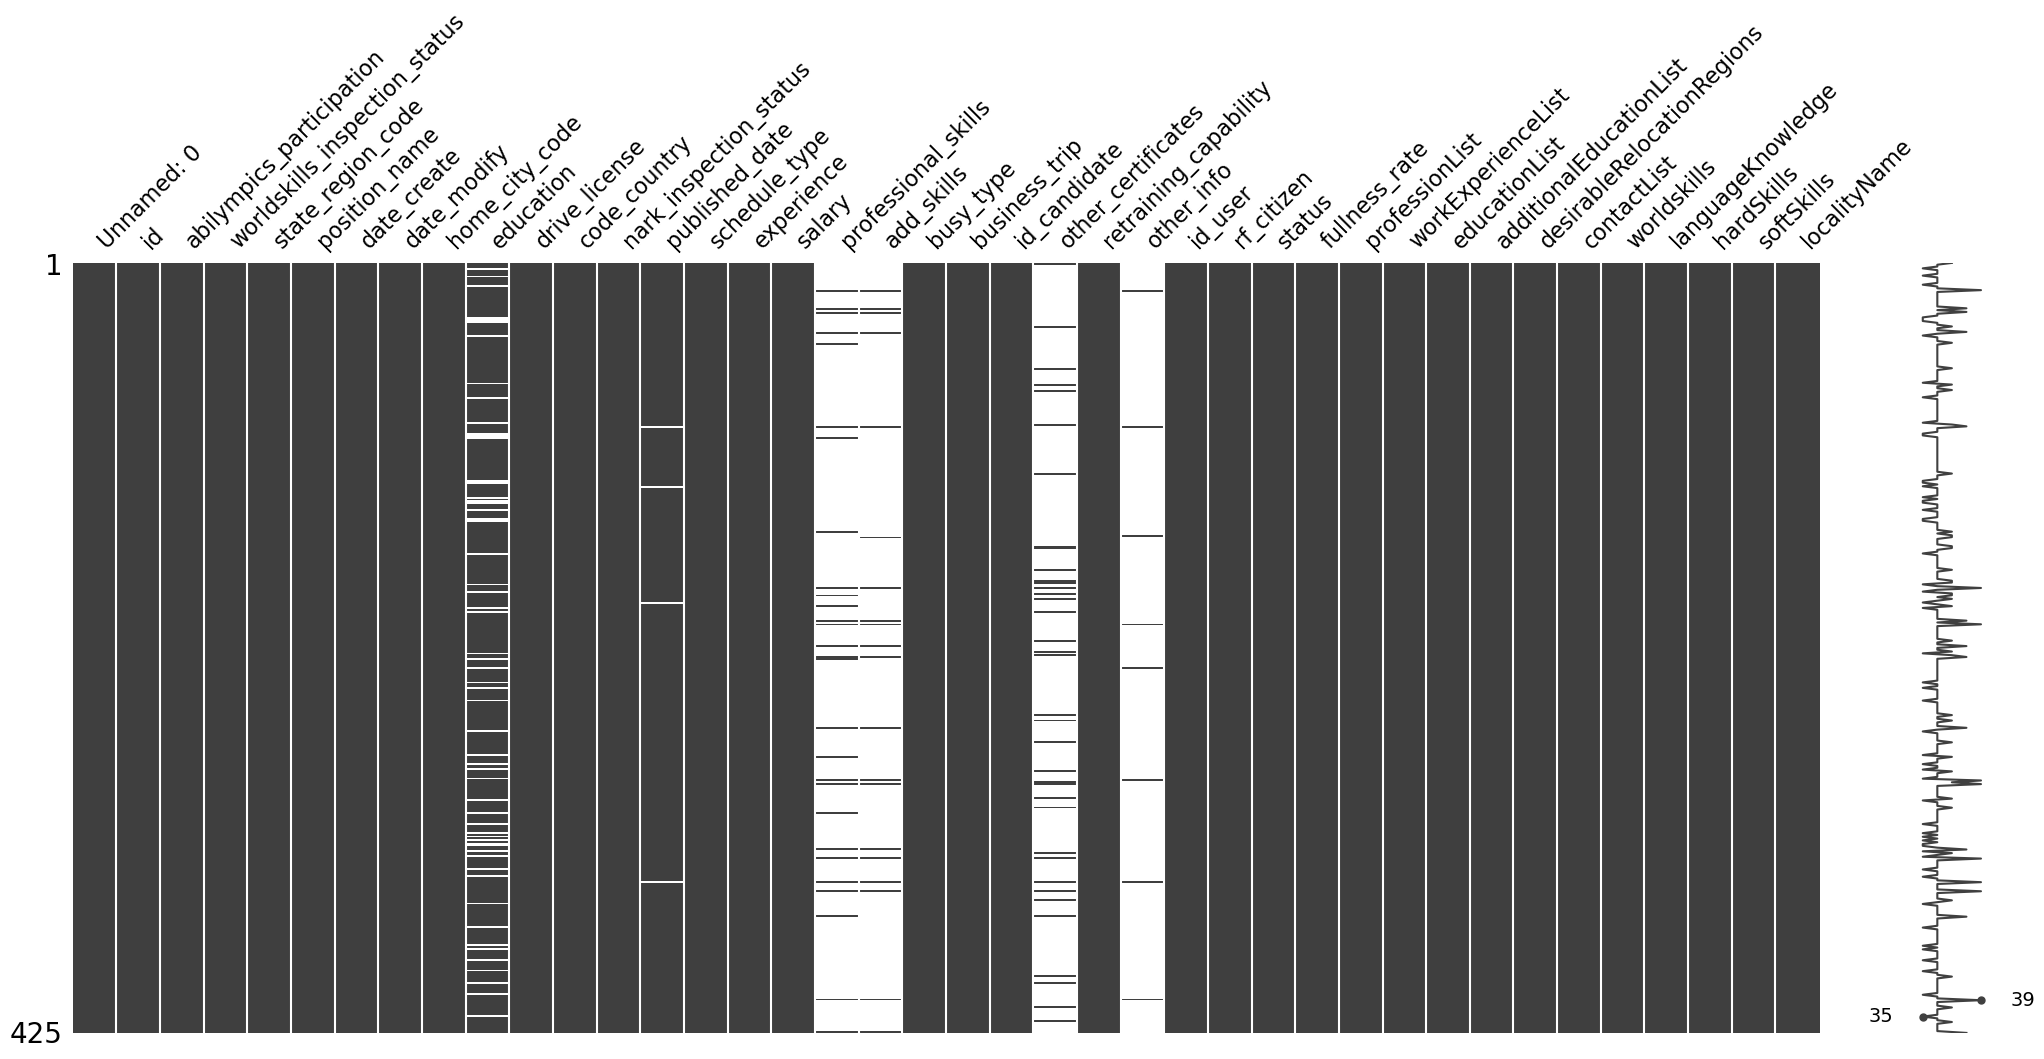

<Figure size 1500x900 with 0 Axes>

In [174]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

**Преимущественно пропуски находятся в столбцах с "Дополнительной информацией" так что думаю их так же можно заполнить missing   для категориальных переменных. Важный столбец "Образование" думаю стоит заполнить средним по умолчанию т.к. по моему мнению данные в столбцах намеренно пропущены, а не утеряны в ввиду операций с датасетом или ошибок сервера, столбец с датой пока заполним тоже т.к. вероятнее всего удалим его в будущем**

In [175]:
df = df.fillna('missing')

In [176]:
df.columns = df.columns.str.replace(r'(?<!^)([A-Z])', r'_\1').str.lower()

**Приведем названия столбцов к общему виду**

In [177]:
pd.set_option('display.max_columns', 500)

In [178]:
df.head()

,unnamed: 0,id,abilympics_participation,worldskills_inspection_status,state_region_code,position_name,date_create,date_modify,home_city_code,education,drive_license,code_country,nark_inspection_status,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,id_candidate,other_certificates,retraining_capability,other_info,id_user,rf_citizen,status,fullness_rate,profession_list,work_experience_list,education_list,additional_education_list,desirable_relocation_regions,contact_list,worldskills,language_knowledge,hard_skills,soft_skills,locality_name
0,44,02f70fc0-5142-11ec-b050-1b29d3b53cbb,False,NOT_APPLICABLE,6100000000000,Техник-программист,2021-11-29T21:27:30+0300,2021-11-29T21:29:16+0300,6100000100000,Среднее-профессиональное,missing,RU,NOT_APPLICABLE,2021-11-30T10:50:53+0300,"Сменный-график,Неполный-рабочий-день,Полный-ра...",2,30000,missing,missing,Полная-занятость,Готов-к-командировкам,c306aef0-19cc-11eb-a336-736ab11edb0c,<p>Присвоен-классный-чин-государственной-гражд...,Готов-к-переобучению,missing,c60a1390-249e-11e5-b38b-1ff705945672,True,ACCEPTED,79,"[{""code_profession"": ""270999"", ""code_professio...","[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...",missing,missing,"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",missing,"[{""code_language"": ""Английский"", ""level"": ""Чте...",missing,missing,"Ростовская-область,-г.-Ростов-на-Дону"
1,54,02f6df20-3b3d-11ec-a60c-839f0d9a4379,False,NOT_APPLICABLE,7800000000000,Программист,2021-11-01T20:56:17+0300,2021-11-28T19:12:25+0300,7800000000000,Среднее,missing,RU,NOT_APPLICABLE,2021-11-28T19:18:18+0300,"Гибкий-график,Сменный-график,Полный-рабочий-день",14,30000,missing,missing,Полная-занятость,Не-готов-к-командировкам,70f11d60-3b38-11ec-a077-7bf9d8e248ac,missing,Готов-к-переобучению,missing,048b3b20-8e30-11eb-9809-5d9e90ab9534,True,ACCEPTED,69,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""graduate_year"": 1995, ""institute_name"": ""Шк...",missing,missing,"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",missing,"[{""code_language"": ""Русский"", ""level"": ""Родной...",missing,missing,г.-Санкт-Петербург
2,294,02efefb0-0e43-11ed-81ab-7fb917d16256,False,NOT_APPLICABLE,5600000000000,Программист,2022-07-28T10:00:49+0300,2022-07-29T10:30:56+0300,5600000200000,Среднее,missing,RU,NOT_APPLICABLE,2022-07-29T14:04:11+0300,"Гибкий-график,Полный-рабочий-день,Вахтовый-метод",0,25000,missing,missing,Удаленная,Не-готов-к-командировкам,6fef4e90-028a-11ed-8c5e-add87b92f9ec,missing,Готов-к-переобучению,missing,dbeca090-18c5-11e5-b612-1ff705945672,True,ACCEPTED,73,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""graduate_year"": 2020, ""institute_name"": ""мб...",missing,missing,"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",missing,"[{""code_language"": ""Французский"", ""level"": ""Ба...","[{""hard_skill_name"": ""стрессоустойчивость"", ""o...","[{""owner_id"": ""02efefb0-0e43-11ed-81ab-7fb917d...","Оренбургская-область,-г.-Медногорск"
3,415,02ec5b90-658a-11ed-8193-e57b87a63fa7,False,NOT_APPLICABLE,1600000000000,Программист,2022-11-16T11:38:14+0300,2022-11-16T11:38:14+0300,1600000100000,missing,missing,RU,NOT_APPLICABLE,2022-11-17T09:21:38+0300,Полный-рабочий-день,0,39157,missing,missing,Полная-занятость,Не-готов-к-командировкам,908502f0-7e12-11ec-b77d-956717074877,missing,Готов-к-переобучению,missing,2f73dc30-23f5-11e5-b38b-1ff705945672,True,ACCEPTED,53,"[{""code_profession"": ""258573"", ""code_professio...",missing,"[{""owner_id"": ""02ec5b90-658a-11ed-8193-e57b87a...",missing,missing,"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",missing,missing,missing,missing,"Республика-Татарстан,-г.-Казань"
4,689,029ebe60-e0d0-11ec-a466-839f0d9a4379,False,NOT_APPLICABLE,5700000000000,Техник-программист,2022-05-31T13:54:

In [179]:
df.duplicated().sum()

0

In [180]:
df['id_user'].duplicated().sum()

108

In [181]:
df['id_candidate'].duplicated().sum()

1

In [182]:
df[df['id_user'].duplicated()]

,unnamed: 0,id,abilympics_participation,worldskills_inspection_status,state_region_code,position_name,date_create,date_modify,home_city_code,education,drive_license,code_country,nark_inspection_status,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,id_candidate,other_certificates,retraining_capability,other_info,id_user,rf_citizen,status,fullness_rate,profession_list,work_experience_list,education_list,additional_education_list,desirable_relocation_regions,contact_list,worldskills,language_knowledge,hard_skills,soft_skills,locality_name
21,5060,12fcdf30-fb6a-11ec-92cb-1b29d3b53cbb,False,NOT_APPLICABLE,5200000000000,"наладчик-станков-с-ЧПУ-6-разряда,-технолог-про...",2022-07-04T10:22:34+0300,2022-07-04T10:22:34+0300,5200000100000,Среднее-профессиональное,missing,RU,NOT_APPLICABLE,2022-07-04T16:34:46+0300,Полный-рабочий-день,52,45000,missing,missing,Полная-занятость,Не-готов-к-командировкам,f89e5470-fb64-11ec-871c-e50d761c97f6,missing,Не-готов-к-переобучению,missing,b0fd3be0-1bd8-11e5-8d85-1ff705945672,True,ACCEPTED,67,"[{""code_professional_sphere"": ""Industry"", ""own...","[{""achievements"": ""<p>Разработка и отладка УП ...","[{""faculty"": ""Электрооборудование промышленных...",missing,missing,"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",missing,"[{""code_language"": ""Русский"", ""level"": ""Базовы...",missing,missing,"Нижегородская-область,-г.-Нижний-Новгород"
32,7883,130868d0-d416-11ec-9b07-1b29d3b53cbb,False,NOT_APPLICABLE,6600000000000,Программист,2022-05-15T09:13:01+0300,2022-05-15T09:13:01+0300,6600002300000,missing,missing,RU,NOT_APPLICABLE,2022-05-16T10:00:38+0300,Полный-рабочий-день,0,55000,missing,missing,Полная-занятость,Не-готов-к-командировкам,82089e00-d414-11ec-aa25-8b73fce3b7f1,missing,Не-готов-к-переобучению,missing,4f1770f0-9a57-11ea-9a1d-c3d833d6401c,True,ACCEPTED,48,"[{""code_professional_sphere"": ""Safety"", ""owner...",missing,"[{""owner_id"": ""130868d0-d416-11ec-9b07-1b29d3b...",missing,missing,"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",missing,missing,missing,missing,"Свердловская-область,-г.-Нижний-Тагил"
45,10342,10eb3790-067e-11ed-9021-839f0d9a4379,False,NOT_APPLICABLE,7700000000000,Программист-сайтов-на-1С-Битрикс,2022-07-18T12:43:23+0300,2022-07-18T13:22:48+0300,7700000000000,Среднее-профессиональное,missing,RU,NOT_APPLICABLE,2022-07-18T17:14:41+0300,Гибкий-график,13,80000,missing,missing,Удаленная,Не-готов-к-командировкам,7d8d5fe0-0679-11ed-8a08-a7f767c3cfb3,missing,Готов-к-переобучению,missing,1a562d70-7386-11ec-804b-296f7e9e4719,True,ACCEPTED,79,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""ИП Косова Ирина Юрьевна"", ""...","[{""faculty"": ""Программное обеспечение"", ""gradu...",missing,missing,"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",missing,"[{""code_language"": ""Русский"", ""level"": ""Родной...","[{""hard_skill_name"": ""программирование"", ""owne...","[{""owner_id"": ""10eb3790-067e-11ed-9021-839f0d9...",г.-Москва
48,10615,10e3a450-e7af-11ec-8bbe-956717074877,False,NOT_APPLICABLE,3600000000000,Программист-1С,2022-06-09T07:46:03+0300,2022-06-09T07:46:03+0300,3600000100000,Высшее,missing,RU,NOT_APPLICABLE,2022-06-09T11:03:52+0300,"Гибкий-график,Сменный-график,Неполный-рабочий-...",1,60000,missing,missing,Удаленная,Не-готов-к-командировкам,65d949c0-7a9b-11ea-97de-ef76bd2a03c1,missing,Готов-к-переобучению,missing,2276da50-1428-11e5-8a60-1ff705945672,True,ACCEPTED,75,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""ООО УК \""Перспектива\"""", ""d...","[{""faculty"": ""Физ-мат"", ""graduate_year"": 2010,...","[{""graduate_year"": 2010, ""name"": ""Основы предп...",missing,"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",missing,"[{""code_language"": ""Русский"", ""level"": ""Родной...",missing,missing,"Воронежская-область,-г.-Воронеж"
49,11275,12264210-dd1d-11ec-818b-1b29d3b53cbb,False,WAITING,7800000000000,Программист-

In [183]:
df.query('id_candidate == "4ede6940-21ec-11ec-a1b3-435dcfab4560"')

,unnamed: 0,id,abilympics_participation,worldskills_inspection_status,state_region_code,position_name,date_create,date_modify,home_city_code,education,drive_license,code_country,nark_inspection_status,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,id_candidate,other_certificates,retraining_capability,other_info,id_user,rf_citizen,status,fullness_rate,profession_list,work_experience_list,education_list,additional_education_list,desirable_relocation_regions,contact_list,worldskills,language_knowledge,hard_skills,soft_skills,locality_name
70,15826,11948d60-2ab8-11ec-a5b6-0d5d229cdfdc,False,NOT_APPLICABLE,4200000000000,программист,2021-10-11T20:24:19+0300,2021-10-11T20:45:19+0300,4201400100000,Среднее-профессиональное,missing,RU,NOT_APPLICABLE,2021-10-12T04:47:53+0300,Полный-рабочий-день,0,20000,missing,missing,Полная-занятость,Не-готов-к-командировкам,4ede6940-21ec-11ec-a1b3-435dcfab4560,"<p><br-data-mce-bogus=""1""></p>",Готов-к-переобучению,missing,c54fb8c0-7b14-11ea-9fd7-5d9e90ab9534,True,ACCEPTED,75,"[{""code_profession"": ""258573"", ""code_professio...",missing,"[{""diploma_name"": ""колесные пары"", ""faculty"": ...",missing,missing,"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",missing,"[{""code_language"": ""Русский"", ""level"": ""Базовы...",missing,missing,"Кемеровская-область,-г.-Топки"
175,40407,14960d90-2ab8-11ec-a5b6-0d5d229cdfdc,False,NOT_APPLICABLE,4200000000000,программист,2021-10-11T20:24:24+0300,2021-10-11T20:45:10+0300,4201400100000,Среднее-профессиональное,missing,RU,NOT_APPLICABLE,2021-10-12T04:47:26+0300,Полный-рабочий-день,0,20000,missing,missing,Полная-занятость,Не-готов-к-командировкам,4ede6940-21ec-11ec-a1b3-435dcfab4560,"<p><br-data-mce-bogus=""1""></p>",Готов-к-переобучению,missing,c54fb8c0-7b14-11ea-9fd7-5d9e90ab9534,True,ACCEPTED,75,"[{""code_profession"": ""258573"", ""code_professio...",missing,"[{""diploma_name"": ""колесные пары"", ""faculty"": ...",missing,missing,"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",missing,"[{""code_language"": ""Русский"", ""level"": ""Базовы...",missing,missing,"Кемеровская-область,-г.-Топки"


In [184]:
df[df.duplicated(subset='id_user')]['contact_list'].nunique()

108

In [185]:
df.drop_duplicates(subset=['id_candidate'],inplace=True)

In [186]:
len(df)

424

**Был один дубликат в столбце id_candidate**

In [187]:
def uni_count(name_col):
    uniq = df[name_col].unique()
    v_counts = df[name_col].value_counts()
    return uniq, v_counts

In [188]:
df.head(1)

,unnamed: 0,id,abilympics_participation,worldskills_inspection_status,state_region_code,position_name,date_create,date_modify,home_city_code,education,drive_license,code_country,nark_inspection_status,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,id_candidate,other_certificates,retraining_capability,other_info,id_user,rf_citizen,status,fullness_rate,profession_list,work_experience_list,education_list,additional_education_list,desirable_relocation_regions,contact_list,worldskills,language_knowledge,hard_skills,soft_skills,locality_name
0,44,02f70fc0-5142-11ec-b050-1b29d3b53cbb,False,NOT_APPLICABLE,6100000000000,Техник-программист,2021-11-29T21:27:30+0300,2021-11-29T21:29:16+0300,6100000100000,Среднее-профессиональное,missing,RU,NOT_APPLICABLE,2021-11-30T10:50:53+0300,"Сменный-график,Неполный-рабочий-день,Полный-ра...",2,30000,missing,missing,Полная-занятость,Готов-к-командировкам,c306aef0-19cc-11eb-a336-736ab11edb0c,<p>Присвоен-классный-чин-государственной-гражд...,Готов-к-переобучению,missing,c60a1390-249e-11e5-b38b-1ff705945672,True,ACCEPTED,79,"[{""code_profession"": ""270999"", ""code_professio...","[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...",missing,missing,"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",missing,"[{""code_language"": ""Английский"", ""level"": ""Чте...",missing,missing,"Ростовская-область,-г.-Ростов-на-Дону"


In [189]:
uni_count('language_knowledge')

(array(['[{"code_language": "Английский", "level": "Чтение и письмо со словарем", "owner_id": "02f70fc0-5142-11ec-b050-1b29d3b53cbb", "type": "LanguageKnowledge"}, {"code_language": "Русский", "level": "Базовый", "owner_id": "02f70fc0-5142-11ec-b050-1b29d3b53cbb", "type": "LanguageKnowledge"}]',
        '[{"code_language": "Русский", "level": "Родной", "owner_id": "02f6df20-3b3d-11ec-a60c-839f0d9a4379", "type": "LanguageKnowledge"}]',
        '[{"code_language": "Французский", "level": "Базовый", "owner_id": "02efefb0-0e43-11ed-81ab-7fb917d16256", "type": "LanguageKnowledge"}, {"code_language": "Английский", "level": "Базовый", "owner_id": "02efefb0-0e43-11ed-81ab-7fb917d16256", "type": "LanguageKnowledge"}]',
        'missing',
        '[{"code_language": "Русский", "level": "Родной", "owner_id": "029ebe60-e0d0-11ec-a466-839f0d9a4379", "type": "LanguageKnowledge"}]',
        '[{"code_language": "Английский", "level": "Чтение и письмо со словарем", "owner_id": "029a2320-e344-11ec-8bbe-

**Проверю все фичи которые меня интересуют, но не буду сохранять много строк кода что бы визуально не нагружать ревью**

In [190]:
df.drop(['unnamed: 0','contact_list','other_info','professional_skills','additional_education_list', 'id', 'worldskills_inspection_status','other_certificates','id_candidate', 'state_region_code', 'add_skills', 'published_date', 'date_create', 'date_modify', 'home_city_code', 'desirable_relocation_regions', 'code_country', 'rf_citizen', 'nark_inspection_status','education_list','id_user','status', 'worldskills', 'hard_skills', 'soft_skills'], axis=1, inplace=True)

**Некоторые столбцы имеют информацию которую можно использовать, но вариативность их написания либо слишком общая, либо слишком разная, и на вход модели будет тяжело это принимать. Их можно загенерить по какому то общему признаку, но пока что мне не пришло в голову хорошей идеи.**

In [191]:
df.head()

,abilympics_participation,position_name,education,drive_license,schedule_type,experience,salary,busy_type,business_trip,retraining_capability,fullness_rate,profession_list,work_experience_list,language_knowledge,locality_name
0,False,Техник-программист,Среднее-профессиональное,missing,"Сменный-график,Неполный-рабочий-день,Полный-ра...",2,30000,Полная-занятость,Готов-к-командировкам,Готов-к-переобучению,79,"[{""code_profession"": ""270999"", ""code_professio...","[{""company_name"": ""Индивидуальный предпринимат...","[{""code_language"": ""Английский"", ""level"": ""Чте...","Ростовская-область,-г.-Ростов-на-Дону"
1,False,Программист,Среднее,missing,"Гибкий-график,Сменный-график,Полный-рабочий-день",14,30000,Полная-занятость,Не-готов-к-командировкам,Готов-к-переобучению,69,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""code_language"": ""Русский"", ""level"": ""Родной...",г.-Санкт-Петербург
2,False,Программист,Среднее,missing,"Гибкий-график,Полный-рабочий-день,Вахтовый-метод",0,25000,Удаленная,Не-готов-к-командировкам,Готов-к-переобучению,73,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""code_language"": ""Французский"", ""level"": ""Ба...","Оренбургская-область,-г.-Медногорск"
3,False,Программист,missing,missing,Полный-рабочий-день,0,39157,Полная-занятость,Не-готов-к-командировкам,Готов-к-переобучению,53,"[{""code_profession"": ""258573"", ""code_professio...",missing,missing,"Республика-Татарстан,-г.-Казань"
4,False,Техник-программист,Среднее-профессиональное,missing,Сменный-график,0,30000,Частичная-занятость,Не-готов-к-командировкам,Не-готов-к-переобучению,71,"[{""code_profession"": ""149959"", ""code_professio...",missing,"[{""code_language"": ""Русский"", ""level"": ""Родной...","Орловская-область,-г.-Новосиль"


In [192]:
df['education'] = df['education'].replace('missing','Среднее')

In [193]:
def extract_profession_list(text):
    values = re.findall(r'"([^"]+)"', text)
    filtered_values = [value for value in values if value.isdigit()]
    return filtered_values

df['profession_list'] = df['profession_list'].apply(lambda x: extract_profession_list(x))
df['profession_list'] = df['profession_list'].apply(lambda x: ', '.join(x))

In [194]:
df['profession_list'] = df['profession_list'].replace('',0)

In [195]:
df['profession_list']= df['profession_list'].astype(int)

In [196]:
def extract_english_level(text):
    match = re.search(r'"code_language": "Английский", "level": "([^"]+)"', text)
    if match:
        return match.group(1)
    else:
        return None

df['language_eng'] = df['language_knowledge'].apply(lambda x: extract_english_level(x))

In [197]:
df['language_eng'] = df['language_eng'].fillna('Плохой')

In [198]:
df['language_eng'] = df['language_eng'].replace('Чтение и письмо со словарем','Базовый')

In [199]:
df['language_eng'].value_counts()

Плохой                           195
Базовый                          160
Способен пройти собеседование     43
Свободный                         26
Name: language_eng, dtype: int64

In [200]:
def extract_russian_level(text):
    match = re.search(r'"code_language": "Русский", "level": "([^"]+)"', text)
    if match:
        return match.group(1)
    else:
        return None
df['language_ru'] = df['language_knowledge'].apply(lambda x: extract_russian_level(x))

In [201]:
df['language_ru'] = df['language_ru'].fillna('Средний')

In [202]:
df['language_ru'] = df['language_ru'].replace('Чтение и письмо со словарем','Базовый')

In [203]:
df['language_ru'].value_counts()

Средний      252
Родной       111
Базовый       38
Свободный     23
Name: language_ru, dtype: int64

In [204]:
df.drop(['language_knowledge'],axis=1,inplace = True)

In [205]:
df.head()

,abilympics_participation,position_name,education,drive_license,schedule_type,experience,salary,busy_type,business_trip,retraining_capability,fullness_rate,profession_list,work_experience_list,locality_name,language_eng,language_ru
0,False,Техник-программист,Среднее-профессиональное,missing,"Сменный-график,Неполный-рабочий-день,Полный-ра...",2,30000,Полная-занятость,Готов-к-командировкам,Готов-к-переобучению,79,270999,"[{""company_name"": ""Индивидуальный предпринимат...","Ростовская-область,-г.-Ростов-на-Дону",Базовый,Базовый
1,False,Программист,Среднее,missing,"Гибкий-график,Сменный-график,Полный-рабочий-день",14,30000,Полная-занятость,Не-готов-к-командировкам,Готов-к-переобучению,69,258573,"[{""company_name"": ""Corbina Telecom"", ""date_fro...",г.-Санкт-Петербург,Плохой,Родной
2,False,Программист,Среднее,missing,"Гибкий-график,Полный-рабочий-день,Вахтовый-метод",0,25000,Удаленная,Не-готов-к-командировкам,Готов-к-переобучению,73,258573,"[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","Оренбургская-область,-г.-Медногорск",Базовый,Средний
3,False,Программист,Среднее,missing,Полный-рабочий-день,0,39157,Полная-занятость,Не-готов-к-командировкам,Готов-к-переобучению,53,258573,missing,"Республика-Татарстан,-г.-Казань",Плохой,Средний
4,False,Техник-программист,Среднее-профессиональное,missing,Сменный-график,0,30000,Частичная-занятость,Не-готов-к-командировкам,Не-готов-к-переобучению,71,149959,missing,"Орловская-область,-г.-Новосиль",Плохой,Родной


In [206]:
df['abilympics_participation'] = df['abilympics_participation'].astype(int)

In [207]:
df['position_name'] = df['position_name'].str.lower()

In [208]:
uni_count('position_name')

(array(['техник-программист', 'программист', 'инженер---программист-c/c++',
        'программист,-системный-администратор,-it-специалист.-водитель-категории-в,-водитель-экспедитор.-слесарь,-по-ремонту-техники.',
        'инженер-программист-асу-тп', 'инженер-технолог-программист',
        'инженер-программист-асу-тп-(scada),-инженер-метролог',
        'помощник-программиста',
        'наладчик-станков-с-чпу-6-разряда,-технолог-программист-станков-с-чпу',
        'младший-инженер-программист', 'начинающий-программист',
        'инженер-программист', 'программист-1с',
        'программист-сайтов-на-1с-битрикс', 'программист-c#',
        'инженер-технической-поддержки-/-службы,-эникейщик,-системный-администратор-(помощник-/-стажёр),-программист-(стажёр)',
        'инженер-программист-асутп', 'помошник-программиста',
        'программист,-специалист',
        'разработчик-бд,-программист,-аналитик,-менеджер-проектов',
        'программист(фронт-энд)', 'программист-(junior-c#-разработчик)',

In [209]:
def rename_position(row):
    if 'стажёр' in row or 'стажер' in row or 'помо' in row or 'jun' in row or 'млад' in row or 'нач' in row:
        return 'стажер'
    elif 'java' in row:
        return 'java'
    elif 'c#' in row:
        return 'c#'
    elif 'python' in row:
        return 'python'
    elif '1с' in row:
        return '1с'
    elif 'с+' in row:
        return 'c++'
    elif 'web' in row or 'веб' in row:        
        return 'web'
    elif 'сис' in row and 'адм' in row:
        return 'сис-админ'
    elif "чпу" in row:
        return 'чпу'
    elif 'бд' in row:
        return 'бд'
    elif 'асу' in row:
        return 'асутп'
    else: 
        return 'программист'

In [210]:
df['position_name'] = df['position_name'].apply(rename_position)
df['position_name'].unique()

array(['программист', 'сис-админ', 'асутп', 'стажер', 'чпу', '1с', 'c#',
       'бд', 'java', 'python', 'web', 'c++'], dtype=object)

In [211]:
df['position_name'].value_counts()

программист    319
стажер          31
1с              25
web             13
сис-админ        9
python           6
c#               5
java             5
асутп            3
чпу              3
бд               3
c++              2
Name: position_name, dtype: int64

In [212]:
df['education'].unique()

array(['Среднее-профессиональное', 'Среднее', 'Высшее',
       'Незаконченное-высшее'], dtype=object)

In [213]:
df['drive_license'].unique()

array(['missing', "['B']", "['B',-'C']", "['A',-'B']"], dtype=object)

In [214]:
df['schedule_type'] = df['schedule_type'].str.lower()

In [215]:
df['schedule_type'] = [s.replace('-', ' ') for s in df['schedule_type']]

In [216]:
df['schedule_type'].unique()

array(['сменный график,неполный рабочий день,полный рабочий день',
       'гибкий график,сменный график,полный рабочий день',
       'гибкий график,полный рабочий день,вахтовый метод',
       'полный рабочий день', 'сменный график',
       'сменный график,неполный рабочий день',
       'ненормированный рабочий день,гибкий график,полный рабочий день,неполный рабочий день',
       'гибкий график,неполный рабочий день,полный рабочий день',
       'гибкий график,полный рабочий день,неполный рабочий день',
       'ненормированный рабочий день,гибкий график,сменный график,полный рабочий день,неполный рабочий день',
       'полный рабочий день,неполный рабочий день',
       'неполный рабочий день',
       'гибкий график,сменный график,полный рабочий день,неполный рабочий день',
       'гибкий график,неполный рабочий день',
       'сменный график,полный рабочий день', 'гибкий график',
       'гибкий график,сменный график,неполный рабочий день,полный рабочий день',
       'ненормированный рабоч

In [217]:
flexible_group = ["Ненормированный рабочий день", "Гибкий график", "Сменный график"]
rigid_group = ["Полный рабочий день", "Неполный рабочий день", "Вахтовый метод"]


In [218]:
def rename_work_schedule(row):
    flexible = ['сменный график', 'гибкий график', 'ненормированный рабочий день']
    rigid = ['полный рабочий день', 'неполный рабочий день', 'вахтовый метод']

    if any(item in row for item in flexible) and not any(item in row for item in rigid):
        return 'гибкий'
    elif any(item in row for item in rigid) and not any(item in row for item in flexible):
        return 'жесткий'
    else:
        return 'комбинированный'

In [219]:
df['schedule_type'] = df['schedule_type'].apply(rename_work_schedule)

In [220]:
df['schedule_type'].unique()

array(['комбинированный', 'жесткий', 'гибкий'], dtype=object)

**Уникальных значений слишком много, а модельки такое не любят. Добавим категории.**

In [221]:
df.head()

,abilympics_participation,position_name,education,drive_license,schedule_type,experience,salary,busy_type,business_trip,retraining_capability,fullness_rate,profession_list,work_experience_list,locality_name,language_eng,language_ru
0,0,программист,Среднее-профессиональное,missing,комбинированный,2,30000,Полная-занятость,Готов-к-командировкам,Готов-к-переобучению,79,270999,"[{""company_name"": ""Индивидуальный предпринимат...","Ростовская-область,-г.-Ростов-на-Дону",Базовый,Базовый
1,0,программист,Среднее,missing,комбинированный,14,30000,Полная-занятость,Не-готов-к-командировкам,Готов-к-переобучению,69,258573,"[{""company_name"": ""Corbina Telecom"", ""date_fro...",г.-Санкт-Петербург,Плохой,Родной
2,0,программист,Среднее,missing,комбинированный,0,25000,Удаленная,Не-готов-к-командировкам,Готов-к-переобучению,73,258573,"[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","Оренбургская-область,-г.-Медногорск",Базовый,Средний
3,0,программист,Среднее,missing,жесткий,0,39157,Полная-занятость,Не-готов-к-командировкам,Готов-к-переобучению,53,258573,missing,"Республика-Татарстан,-г.-Казань",Плохой,Средний
4,0,программист,Среднее-профессиональное,missing,гибкий,0,30000,Частичная-занятость,Не-готов-к-командировкам,Не-готов-к-переобучению,71,149959,missing,"Орловская-область,-г.-Новосиль",Плохой,Родной


In [222]:
df['locality_name'].unique()

array(['Ростовская-область,-г.-Ростов-на-Дону', 'г.-Санкт-Петербург',
       'Оренбургская-область,-г.-Медногорск',
       'Республика-Татарстан,-г.-Казань',
       'Орловская-область,-г.-Новосиль',
       'Нижегородская-область,-г.-Нижний-Новгород',
       'Ставропольский-край,-г.-Ставрополь',
       'Республика-Саха-(Якутия),-Хонуу-село',
       'Республика-Алтай,-Сёйка-село', 'Краснодарский-край,-г.-Тимашевск',
       'Республика-Коми,-г.-Сыктывкар',
       'Ярославская-область,-г.-Переславль-Залесский',
       'Республика-Дагестан', 'Воронежская-область,-г.-Воронеж',
       'Архангельская-область,-г.-Шенкурск',
       'Самарская-область,-г.-Сызрань',
       'Чеченская-Республика,-г.-Грозный',
       'Челябинская-область,-г.-Челябинск',
       'Челябинская-область,-г.-Еманжелинск',
       'Новосибирская-область,-Краснозерское-рабочий-поселок',
       'Владимирская-область,-г.-Кольчугино', 'Новосибирская-область',
       'Кемеровская-область,-г.-Прокопьевск', 'Хабаровский-край',
    

In [223]:
df['locality_name'] = df['locality_name'].str.lower()

In [224]:
def rename_locality(row):
    
    big_city = ["новосибирск","екатеринбург","нижний новгород", "казань", "челябинск", "омск", "самара", "ростов-на-дону", "уфа", "красноярск", "пермь", "воронеж"]

    
    if 'санкт' in row:
        return 'спб'
    elif 'москва' in row:
        return 'мск'
    elif any(item in row for item in big_city):
        return 'большой город'
    else:
        return 'регион'

In [225]:
df['locality_name'] = df['locality_name'].apply(rename_locality)

In [226]:
df.head()

,abilympics_participation,position_name,education,drive_license,schedule_type,experience,salary,busy_type,business_trip,retraining_capability,fullness_rate,profession_list,work_experience_list,locality_name,language_eng,language_ru
0,0,программист,Среднее-профессиональное,missing,комбинированный,2,30000,Полная-занятость,Готов-к-командировкам,Готов-к-переобучению,79,270999,"[{""company_name"": ""Индивидуальный предпринимат...",большой город,Базовый,Базовый
1,0,программист,Среднее,missing,комбинированный,14,30000,Полная-занятость,Не-готов-к-командировкам,Готов-к-переобучению,69,258573,"[{""company_name"": ""Corbina Telecom"", ""date_fro...",спб,Плохой,Родной
2,0,программист,Среднее,missing,комбинированный,0,25000,Удаленная,Не-готов-к-командировкам,Готов-к-переобучению,73,258573,"[{""company_name"": ""КФКСТ и МП г. Медногорска"",...",регион,Базовый,Средний
3,0,программист,Среднее,missing,жесткий,0,39157,Полная-занятость,Не-готов-к-командировкам,Готов-к-переобучению,53,258573,missing,большой город,Плохой,Средний
4,0,программист,Среднее-профессиональное,missing,гибкий,0,30000,Частичная-занятость,Не-готов-к-командировкам,Не-готов-к-переобучению,71,149959,missing,регион,Плохой,Родной


In [227]:
def extract_relevant(work_exp_list):
    try:
        work_exp_json = json.loads(work_exp_list)
        relevant_values = [exp['relevant'] for exp in work_exp_json]
        return 1
    except:
        return 0

In [228]:
df['work_experience_list'] = df['work_experience_list'].apply(extract_relevant)

### Вывод по предобработке данных


- Проведена работа с пропусками, значения заменены на missing во всех столбцах кроме education.


- Найден и удален один дубликат.


- Были удалены некоторые фичи ввиду - большого количества пропусков, неинформативности, большого количества уникальных значений.


- Информация в некоторых столбцах была сгруппирована в категории


- Названия колонок были приведены в нижний регистр и разделены нижним подчеркиванием

# 2. EDA <a class="anchor" id="second-bullet"></a>

In [229]:
num_cols = df.select_dtypes(include=['int', 'float']).columns
cat_cols = df.select_dtypes(include=['object']).columns
df_num = df[num_cols]

In [230]:
plt.rcParams["figure.figsize"] = (6, 4)

In [231]:
df_num.describe()

,abilympics_participation,experience,salary,fullness_rate,profession_list,work_experience_list
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,0.004717,3.304245,46489.162736,66.872642,203321.224057,0.596698
std,0.068599,6.196879,40459.791462,14.347191,108885.409755,0.491140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,25000.000000,61.000000,228243.000000,0.000000
50%,0.000000,1.000000,40000.000000,67.000000,258573.000000,1.000000
75%,0.000000,4.000000,50000.000000,75.000000,258573.000000,1.000000
max,1.000000,52.000000,350000.000000,100.000000,428438.000000,1.000000


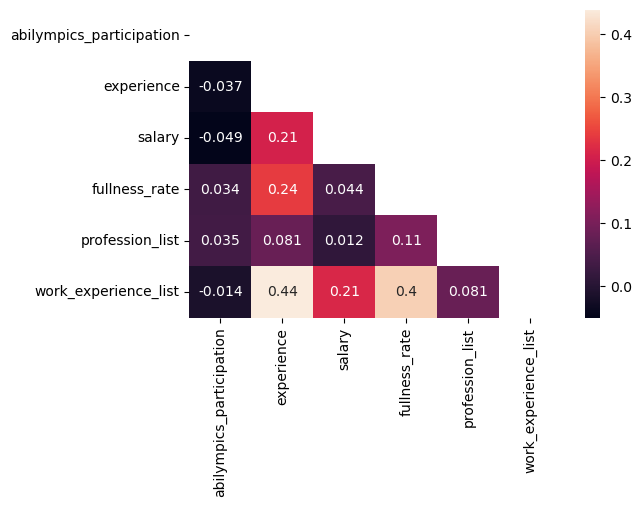

In [232]:
mask = np.triu(np.ones_like(df_num.corr(), dtype=bool))
sns.heatmap(df_num.corr(), annot=True, mask=mask);

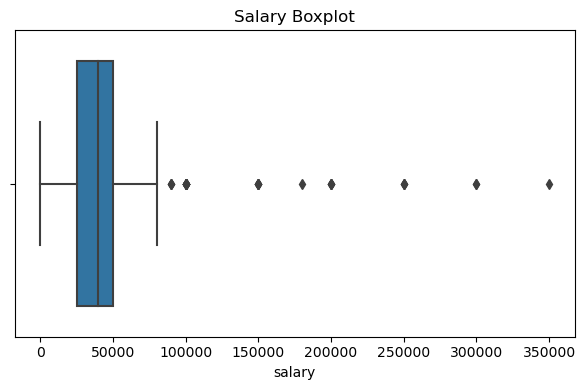

In [233]:
sns.boxplot(x=df['salary'])
plt.title("Salary Boxplot")
    
plt.tight_layout()
plt.show()

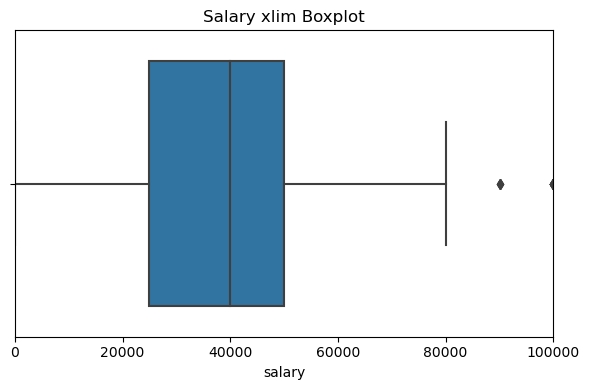

In [234]:
sns.boxplot(x=df['salary']).set(xlim=(0,100000))
plt.title("Salary xlim Boxplot")
plt.tight_layout()
plt.show()

<Axes: xlabel='salary', ylabel='Count'>

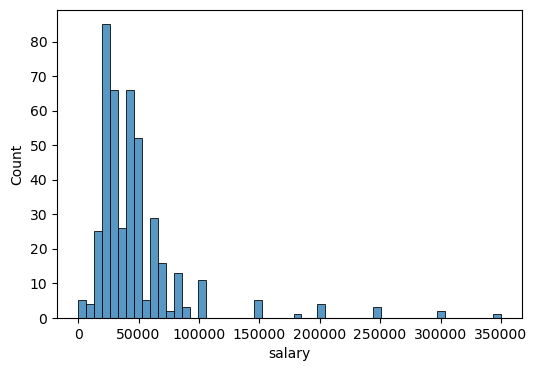

In [235]:
sns.histplot(data = df['salary'])

**Зарплата 0 скорее всего является аномалией**

In [236]:
df.query('salary < 10000')

,abilympics_participation,position_name,education,drive_license,schedule_type,experience,salary,busy_type,business_trip,retraining_capability,fullness_rate,profession_list,work_experience_list,locality_name,language_eng,language_ru
111,0,программист,Незаконченное-высшее,missing,комбинированный,0,1,Стажировка,Готов-к-командировкам,Готов-к-переобучению,67,258573,0,регион,Базовый,Родной
124,0,web,Высшее,missing,комбинированный,2,60,Полная-занятость,Не-готов-к-командировкам,Не-готов-к-переобучению,61,0,1,регион,Плохой,Средний
144,0,программист,Незаконченное-высшее,missing,комбинированный,0,0,Стажировка,Не-готов-к-командировкам,Готов-к-переобучению,71,258573,0,регион,Базовый,Родной
232,0,стажер,Высшее,missing,жесткий,0,5000,Полная-занятость,Готов-к-командировкам,Готов-к-переобучению,72,258573,0,большой город,Свободный,Средний
296,0,программист,Среднее,missing,жесткий,0,8500,Временная,Не-готов-к-командировкам,Не-готов-к-переобучению,52,270999,0,большой город,Плохой,Средний
332,0,программист,Высшее,missing,жесткий,2,60,Полная-занятость,Готов-к-командировкам,Готов-к-переобучению,77,258573,1,регион,Базовый,Свободный


**Двое кто с опытом скорее всего указали зарплату в тысячах, а вот вторые двое кажется просто ищут опыт и решили не указывать зарплату, но нам такие данные только мешают**

In [237]:
df = df.query('salary > 2')

In [238]:
df['salary'] = df['salary'].apply(lambda x: x*1000 if x == 60 else x)

<Axes: xlabel='salary', ylabel='experience'>

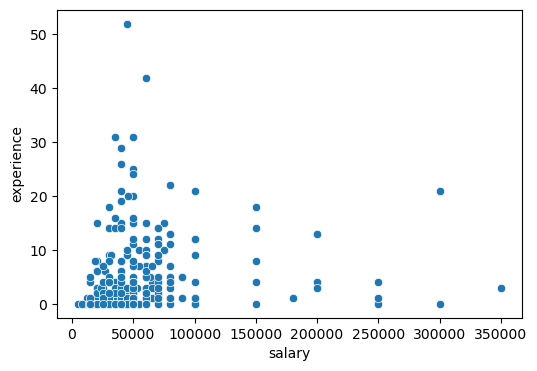

In [239]:
sns.scatterplot(x = df['salary'], y = df['experience'])

<Axes: xlabel='experience', ylabel='Count'>

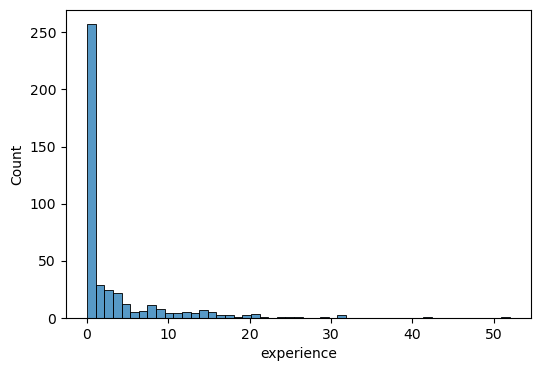

In [240]:
sns.histplot(data = df['experience'])

In [241]:
df_first.query('experience > 30')['educationList'].unique()

array(['[{"faculty": "ФАВТ", "graduate_year": 1991, "institute_name": "Кировский политехнический институт", "owner_id": "02bc9df0-e4b2-11ec-818b-1b29d3b53cbb", "speciality": "инженер-электрик", "type": "Education"}]',
       '[{"faculty": "Электрооборудование промышленных предприятий и установок", "graduate_year": 1982, "institute_name": "Горьковский автомеханический техникум", "owner_id": "12fcdf30-fb6a-11ec-92cb-1b29d3b53cbb", "qualification": "техник-электрик", "type": "Education"}]',
       '[{"faculty": "прикладная математика", "graduate_year": 1982, "institute_name": "МАИ, ВИКИ", "owner_id": "00e38ea0-8e81-11ea-9188-1fdc17069750", "qualification": "военный инженер-баллистик", "speciality": "баллистика, прикладная математика", "type": "Education"}]',
       '[{"graduate_year": 1985, "institute_name": "средняя школа", "owner_id": "00b0ae70-fd76-11ec-9021-839f0d9a4379", "type": "Education"}]'],
      dtype=object)

**Ладно тут вроде проблем нет**

<Axes: xlabel='fullness_rate', ylabel='Count'>

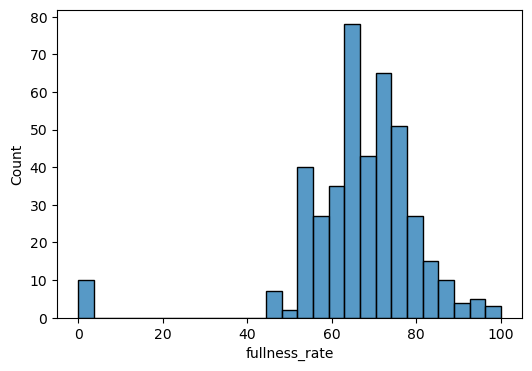

In [242]:
sns.histplot(data = df['fullness_rate'])

In [243]:
X = df.drop('salary', axis=1)
y = df['salary']

In [244]:
RS = 42

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)

**Базой считается разбивать выборки на 1/4 и 3/4 если мы работаем без валидации, но давайте возьмем побольше данных т.к. у нас их и так мало**

In [246]:
X_train_first = X_train.copy()
X_test_first = X_test.copy()

In [247]:
scale_cols = X.select_dtypes(include=['int', 'float']).columns

In [248]:
scaler = StandardScaler()

In [249]:
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

**Масштабируем данные**

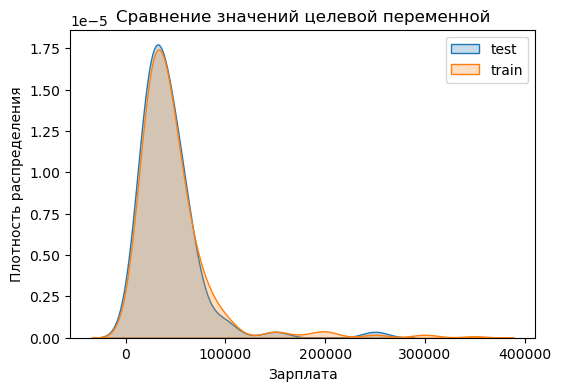

In [250]:
fig, ax_kde = plt.subplots(figsize=(6,4))

sns.kdeplot(y_test, label='test', shade=True)
sns.kdeplot(y_train, label='train', shade=True)
ax_kde.set(xlabel='Зарплата',
           ylabel='Плотность распределения',
           title = 'Сравнение значений целевой переменной')
plt.legend();

## - Сделаем ttest для того что бы убедиться в том что в обеих выборках подобное распределение таргета

**H0 - Размер зарплат равный в обеих выборках**


**H1 - Размер зарплат отличается**

In [251]:
stats.ttest_ind(y_test,y_train)

Ttest_indResult(statistic=-1.0783330301432839, pvalue=0.28150407659063265)

    p-value = 0.187431661359356    statistic = -1.3203667836697761
-  У нас недостаточно оснований отколонить нулевую гипотезу, далее будем работать предпологая равенство зарплат между выборками

# 3. ML <a class="anchor" id="third-bullet"></a>

## training gb model

In [252]:
X_train[cat_cols] = X_train[cat_cols].astype('category')
X_test[cat_cols] = X_test[cat_cols].astype('category')

 params = {
     'task' : ['predict'],
     'boosting': ['gbdt' ],
     'objective': ['root_mean_squared_error'],
     'num_iterations': [1500, 2000,5000 ],
     'learning_rate':[0.05, 0.005 ],
    'num_leaves':[7, 15, 31 ],
    'max_depth' :[10,15,25],
    'min_data_in_leaf':[15,25 ],
   'feature_fraction': [ 0.6, 0.8,  0.9],
     'bagging_fraction': [0.6, 0.8 ],
     'bagging_freq': [100, 200, 400 ],
     
}

grid_search = GridSearchCV(model, params, cv=5)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

- Лучшие параметры: {'bagging_fraction': 0.6, 'bagging_freq': 100, 'boosting': 'gbdt', 'feature_fraction': 0.6, 'learning_rate': 0.005, 'max_depth': 10, 'min_data_in_leaf': 25, 'num_iterations': 1500, 'num_leaves': 7, 'objective': 'root_mean_squared_error', 'task': 'predict'}

**Перевел в Markdown т.к. долго выполняется ячейка**

In [253]:
mse = make_scorer(mean_squared_error, greater_is_better=False)
mae = make_scorer(mean_absolute_error, greater_is_better=False)

In [254]:
def metrics(model,X, y):
    mse_score = cross_val_score(model, X, y, cv=5,scoring=mse)
    mae_score = cross_val_score(model, X, y, cv=5,scoring=mae)
    r2_score = cross_val_score(model, X, y, cv=5)
    mse_score = -mse_score.mean()
    return f'MAE: {-mae_score.mean()}, RMSE: {mse_score**0.5}, R2: {r2_score.mean()}'

In [255]:
params = {
    'bagging_fraction': 0.6,
    'bagging_freq': 100,
    'boosting': 'gbdt',
    'feature_fraction': 0.6,
    'learning_rate': 0.005,
    'max_depth': 10,
    'min_data_in_leaf': 25,
    'num_iterations': 1500,
    'num_leaves': 7,
    'objective': 'root_mean_squared_error'
}

In [256]:
model_lgb = lgb.LGBMRegressor(**params)

In [257]:
metrics(model_lgb,X_train,y_train)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0

'MAE: 24006.48993931032, RMSE: 42374.54035620652, R2: -0.02285911689165212'

## Result's GB <a class="anchor" id="four-bullet"></a>

- Результаты обучения модели на основе данной переменной:
                MAE: 23925.18217343147     RMSE: 42314.93099056318     R2: -0.019763438411561786
--------
Исходя из результатов, можно сделать вывод, что модель не очень хорошо предсказывает значения исследуемой переменной, так как коэффициент детерминации отрицательный. Ошибка предсказания достаточно высока, что указывает на низкую точность модели. так же стоит отметить что модель не предсказывает выбросы (зарплаты свыше 200к).


## training lr model's

In [264]:
X_train.head()

,abilympics_participation,position_name,education,drive_license,schedule_type,experience,busy_type,business_trip,retraining_capability,fullness_rate,profession_list,work_experience_list,locality_name,language_eng,language_ru
0,-0.054554,программист,Среднее,missing,жесткий,-0.540603,Полная-занятость,Не-готов-к-командировкам,Не-готов-к-переобучению,-1.363867,0.645995,-1.261867,регион,Плохой,Средний
1,-0.054554,программист,Среднее,missing,жесткий,-0.540603,Частичная-занятость,Не-готов-к-командировкам,Готов-к-переобучению,-0.809937,-1.780976,0.792477,регион,Плохой,Средний
2,-0.054554,программист,Среднее-профессиональное,missing,жесткий,-0.540603,Полная-занятость,Не-готов-к-командировкам,Готов-к-переобучению,-0.117525,0.534712,-1.261867,регион,Свободный,Родной
3,-0.054554,программист,Среднее-профессиональное,missing,жесткий,-0.377648,Полная-занятость,Готов-к-командировкам,Готов-к-переобучению,0.574887,0.534712,0.792477,регион,Плохой,Средний
4,-0.054554,программист,Среднее,missing,жесткий,-0.540603,Полная-занятость,Не-готов-к-командировкам,Готов-к-переобучению,-0.740696,0.534712,-1.261867,регион,Плохой,Родной


In [265]:
ohe_names = ['education','drive_license',
             'schedule_type','busy_type',
             'business_trip','retraining_capability',
             'locality_name','language_eng','language_ru']
me_names = ['position_name']

In [266]:
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [269]:
def encode_data(X_train, X_test, ohe_names, me_names):
    encoder_ohe = OneHotEncoder()
    X_train_ohe = encoder_ohe.fit_transform(X_train[ohe_names])
    X_test_ohe = encoder_ohe.transform(X_test[ohe_names])
    X_train_ohe_array = X_train_ohe.toarray()
    X_test_ohe_array = X_test_ohe.toarray()
    X_train_ohe_df = pd.DataFrame(X_train_ohe_array, columns=encoder_ohe.get_feature_names_out(ohe_names))
    X_test_ohe_df = pd.DataFrame(X_test_ohe_array, columns=encoder_ohe.get_feature_names_out(ohe_names))
    
    encoder_me = MEstimateEncoder()
    X_train_me = encoder_me.fit_transform(X_train[me_names], y_train)
    X_test_me = encoder_me.transform(X_test[me_names])
    X_train_me_df = X_train_me.add_suffix('_m_estimate')
    X_test_me_df = X_test_me.add_suffix('_m_estimate')
    
    X_train_encoded = pd.concat([X_train.drop(columns=ohe_names+me_names), X_train_ohe_df, X_train_me_df], axis=1)
    X_test_encoded = pd.concat([X_test.drop(columns=ohe_names+me_names), X_test_ohe_df, X_test_me_df], axis=1)
    
    return X_train_encoded, X_test_encoded

In [270]:
X_train_encode, X_test_encode = encode_data(X_train, X_test,ohe_names,me_names)

## ridge регуляризация

In [271]:
ridge = Ridge()

In [272]:
metrics(ridge,X_train_encode,y_train)

'MAE: 23191.906248213152, RMSE: 40499.65996680938, R2: 0.11664263816379702'

## lasso регуляризация

In [273]:
lasso = Lasso()

In [274]:
metrics(lasso,X_train_encode,y_train)

'MAE: 23548.387402162167, RMSE: 40763.573626558864, R2: 0.10532544678215254'

## poly + ridge

---------

**Пробую удалить фичи чтобы исключить мультиколлинеарность**

X_train_encode = X_train_encode.drop('fullness_rate', axis = 1)
X_test_encode = X_test_encode.drop('fullness_rate', axis = 1)

----------

In [275]:
ridge_poly = Ridge()

In [276]:
poly = PolynomialFeatures(degree=2)

In [277]:
X_poly_train = poly.fit_transform(X_train_encode)
X_poly_test = poly.transform(X_test_encode) 

In [278]:
metrics(ridge_poly,X_poly_train,y_train)

'MAE: 23963.85704904408, RMSE: 41369.844672068764, R2: 0.0726119493516946'

**попробуем внести пару изменений в фичи**

In [279]:
df_first.head()

,Unnamed: 0,id,abilympics_inspection_status,abilympics_participation,worldskills_inspection_status,state_region_code,regionNameTerm,position_name,date_create,date_modify,home_city_code,education,academic_degree,drive_license,code_country,nark_inspection_status,nark_certificate,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,id_candidate,other_certificates,retraining_capability,other_info,id_user,publication_period,rf_citizen,status,visibility,code_external_system,deleted,fullness_rate,professionList,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName
0,44,02f70fc0-5142-11ec-b050-1b29d3b53cbb,UNKNOWN,False,NOT_APPLICABLE,6100000000000,NaN,Техник-программист,2021-11-29T21:27:30+0300,2021-11-29T21:29:16+0300,6100000100000,Среднее-профессиональное,NaN,[],RU,NOT_APPLICABLE,NaN,2021-11-30T10:50:53+0300,"Сменный-график,Неполный-рабочий-день,Полный-ра...",2,30000,NaN,NaN,Полная-занятость,Готов-к-командировкам,c306aef0-19cc-11eb-a336-736ab11edb0c,<p>Присвоен-классный-чин-государственной-гражд...,Готов-к-переобучению,NaN,c60a1390-249e-11e5-b38b-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,79,"[{""code_profession"": ""270999"", ""code_professio...","[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Чте...",[],[],"Ростовская-область,-г.-Ростов-на-Дону"
1,54,02f6df20-3b3d-11ec-a60c-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,7800000000000,NaN,Программист,2021-11-01T20:56:17+0300,2021-11-28T19:12:25+0300,7800000000000,Среднее,NaN,[],RU,NOT_APPLICABLE,NaN,2021-11-28T19:18:18+0300,"Гибкий-график,Сменный-график,Полный-рабочий-день",14,30000,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,70f11d60-3b38-11ec-a077-7bf9d8e248ac,NaN,Готов-к-переобучению,NaN,048b3b20-8e30-11eb-9809-5d9e90ab9534,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,69,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""graduate_year"": 1995, ""institute_name"": ""Шк...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...",[],[],г.-Санкт-Петербург
2,294,02efefb0-0e43-11ed-81ab-7fb917d16256,UNKNOWN,False,NOT_APPLICABLE,5600000000000,NaN,Программист,2022-07-28T10:00:49+0300,2022-07-29T10:30:56+0300,5600000200000,Среднее,NaN,[],RU,NOT_APPLICABLE,NaN,2022-07-29T14:04:11+0300,"Гибкий-график,Полный-рабочий-день,Вахтовый-метод",0,25000,NaN,NaN,Удаленная,Не-готов-к-командировкам,6fef4e90-028a-11ed-8c5e-add87b92f9ec,NaN,Готов-к-переобучению,NaN,dbeca090-18c5-11e5-b612-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,73,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""graduate_year"": 2020, ""institute_name"": ""мб...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Французский"", ""level"": ""Ба...","[{""hard_skill_name"": ""стрессоустойчивость"", ""o...","[{""owner_id"": ""02efefb0-0e43-11ed-81ab-7fb917d...","Оренбургская-область,-г.-Медногорск"
3,415,02ec5b90-658a-11ed-8193-e57b87a63fa7,UNKNOWN,False,NOT_APPLICABLE,1600000000000,NaN,Программист,2022-11-16T11:38:14+0300,2022-11-16T11:38:14+0300,1600000100000,NaN,NaN,[],RU,NOT_APPLICABLE,NaN,2022-11-17T09:21:38+0300,Полный-рабочий-день,0,39157,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,908502f0-7e12-11ec-b77d-956717074877,NaN,Готов-к-переобучению,NaN,2f73dc30-23f5-11e5-b38b-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,53,"[{""code_profession"": ""258573"", ""code_professio...",[],"[{""owner_id"": ""02ec5b90-658a-11ed-8193-e57b87a...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],[],[],[],"Республика-Т

In [280]:
df_first['date_modify'] = pd.to_datetime(df_first['date_modify'])
df_first['date_create'] = pd.to_datetime(df_first['date_create'])
df_first['date_create']= df_first['date_create'].dt.strftime('%Y-%m-%d')
df_first['date_modify'] = df_first['date_modify'].dt.strftime('%Y-%m-%d')

In [281]:
df_first.head()

,Unnamed: 0,id,abilympics_inspection_status,abilympics_participation,worldskills_inspection_status,state_region_code,regionNameTerm,position_name,date_create,date_modify,home_city_code,education,academic_degree,drive_license,code_country,nark_inspection_status,nark_certificate,published_date,schedule_type,experience,salary,professional_skills,add_skills,busy_type,business_trip,id_candidate,other_certificates,retraining_capability,other_info,id_user,publication_period,rf_citizen,status,visibility,code_external_system,deleted,fullness_rate,professionList,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName
0,44,02f70fc0-5142-11ec-b050-1b29d3b53cbb,UNKNOWN,False,NOT_APPLICABLE,6100000000000,NaN,Техник-программист,2021-11-29,2021-11-29,6100000100000,Среднее-профессиональное,NaN,[],RU,NOT_APPLICABLE,NaN,2021-11-30T10:50:53+0300,"Сменный-график,Неполный-рабочий-день,Полный-ра...",2,30000,NaN,NaN,Полная-занятость,Готов-к-командировкам,c306aef0-19cc-11eb-a336-736ab11edb0c,<p>Присвоен-классный-чин-государственной-гражд...,Готов-к-переобучению,NaN,c60a1390-249e-11e5-b38b-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,79,"[{""code_profession"": ""270999"", ""code_professio...","[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Чте...",[],[],"Ростовская-область,-г.-Ростов-на-Дону"
1,54,02f6df20-3b3d-11ec-a60c-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,7800000000000,NaN,Программист,2021-11-01,2021-11-28,7800000000000,Среднее,NaN,[],RU,NOT_APPLICABLE,NaN,2021-11-28T19:18:18+0300,"Гибкий-график,Сменный-график,Полный-рабочий-день",14,30000,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,70f11d60-3b38-11ec-a077-7bf9d8e248ac,NaN,Готов-к-переобучению,NaN,048b3b20-8e30-11eb-9809-5d9e90ab9534,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,69,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""graduate_year"": 1995, ""institute_name"": ""Шк...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...",[],[],г.-Санкт-Петербург
2,294,02efefb0-0e43-11ed-81ab-7fb917d16256,UNKNOWN,False,NOT_APPLICABLE,5600000000000,NaN,Программист,2022-07-28,2022-07-29,5600000200000,Среднее,NaN,[],RU,NOT_APPLICABLE,NaN,2022-07-29T14:04:11+0300,"Гибкий-график,Полный-рабочий-день,Вахтовый-метод",0,25000,NaN,NaN,Удаленная,Не-готов-к-командировкам,6fef4e90-028a-11ed-8c5e-add87b92f9ec,NaN,Готов-к-переобучению,NaN,dbeca090-18c5-11e5-b612-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,73,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""graduate_year"": 2020, ""institute_name"": ""мб...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Французский"", ""level"": ""Ба...","[{""hard_skill_name"": ""стрессоустойчивость"", ""o...","[{""owner_id"": ""02efefb0-0e43-11ed-81ab-7fb917d...","Оренбургская-область,-г.-Медногорск"
3,415,02ec5b90-658a-11ed-8193-e57b87a63fa7,UNKNOWN,False,NOT_APPLICABLE,1600000000000,NaN,Программист,2022-11-16,2022-11-16,1600000100000,NaN,NaN,[],RU,NOT_APPLICABLE,NaN,2022-11-17T09:21:38+0300,Полный-рабочий-день,0,39157,NaN,NaN,Полная-занятость,Не-готов-к-командировкам,908502f0-7e12-11ec-b77d-956717074877,NaN,Готов-к-переобучению,NaN,2f73dc30-23f5-11e5-b38b-1ff705945672,0.0,True,ACCEPTED,VISIBLE_TO_ALL,NaN,False,53,"[{""code_profession"": ""258573"", ""code_professio...",[],"[{""owner_id"": ""02ec5b90-658a-11ed-8193-e57b87a...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],[],[],[],"Республика-Татарстан,-г.-Казань"
4,689,029ebe60-e0d0-11ec-a466-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,5700000000000,NaN,Т

In [282]:
df['change_resume'] = (df_first['date_create'] != df_first['date_modify']).astype(int)

**Сохраним фичу с информацией  менялось ли резюме с даты создания**

## Ridge + poly + new feature + upsample

In [283]:
ridge_poly_ups = Ridge()

In [284]:
change_resume_train = df.loc[X_train_first.index, 'change_resume']
change_resume_test = df.loc[X_test_first.index, 'change_resume']

In [285]:
X_train_cr = X_train_encode.copy()
X_test_cr = X_test_encode.copy()

In [286]:
X_train_cr['change_resume'] = change_resume_train.reset_index(drop = True)
X_test_cr['change_resume'] = change_resume_test.reset_index(drop = True)

**Для upsample можно использовать алгоритмы SMOTE или ADASYN, но давайте просто замножим количество наблюдений для объектов с высокой зарплатой**

In [287]:
def upsample(features,target,repeat):
    features_hight = features[target >= 100000]
    features_low = features[target < 100000]
    target_hight = target[target >= 100000]
    target_low = target[target < 100000]
    
    features_upsampled = pd.concat([features_low] + [features_hight] * repeat)
    target_upsampled = pd.concat([target_low] + [target_hight] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled,random_state=RS)

    return features_upsampled, target_upsampled 

In [288]:
features_upsampled, target_upsampled = upsample(X_train_cr, y_train, 4)

data = np.column_stack((features_upsampled, target_upsampled))
data_shuffled = shuffle(data, random_state=RS)
X_ups = data_shuffled[:, :-1]
y_ups = data_shuffled[:, -1]
X_ups = pd.DataFrame(X_ups, columns=X_train_cr.columns)

In [289]:
X_poly_train_v2 = poly.fit_transform(X_ups)
X_poly_test_v2 = poly.transform(X_test_cr)

In [290]:
metrics(ridge_poly_ups,X_poly_train_v2,y_ups)

'MAE: 41627.753692330814, RMSE: 61654.14328378532, R2: 0.1556029823043228'

## Log reg

In [291]:
log_reg = LogisticRegression()

In [292]:
metrics(log_reg,X_train_encode,y_train)

'MAE: 23129.938849868307, RMSE: 45809.52109880913, R2: 0.13353819139596138'

## gb+new features

In [293]:
#X_test.drop('fullness_rate',inplace=True,axis=1)
#X_train.drop('fullness_rate',inplace=True,axis=1)

In [294]:
X_train['change_resume'] = change_resume_train.reset_index(drop = True)

In [295]:
X_test['change_resume'] = change_resume_test.reset_index(drop = True)

In [296]:
metrics(model_lgb,X_train,y_train)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0

'MAE: 24121.50248806046, RMSE: 42565.7886702331, R2: -0.033197357395014546'

In [297]:
model_lgb.fit(X_train,y_train)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100


LGBMRegressor(bagging_fraction=0.6, bagging_freq=100, boosting='gbdt',
              feature_fraction=0.6, learning_rate=0.005, max_depth=10,
              min_data_in_leaf=25, num_iterations=1500, num_leaves=7,
              objective='root_mean_squared_error')

In [298]:
lgb_pred = model_lgb.predict(X_train)

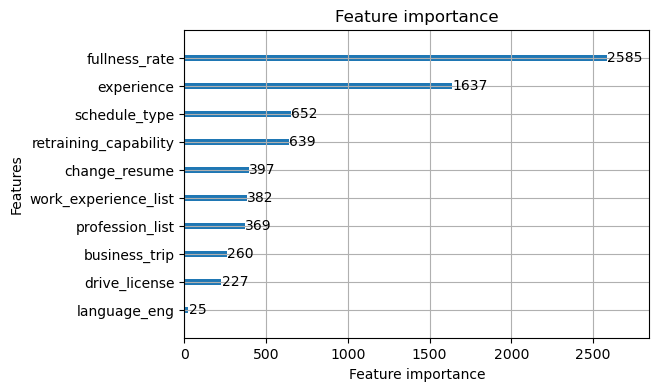

In [299]:
lgb.plot_importance(model_lgb, max_num_features=10)
plt.show()

In [300]:
explainer = shap.TreeExplainer(model_lgb)

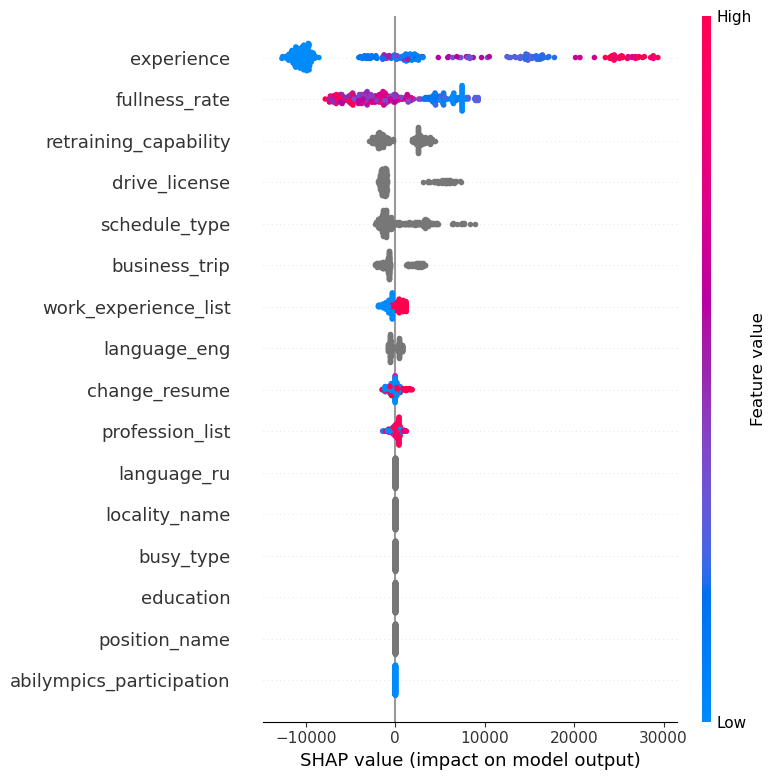

In [301]:
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)
shap.initjs()

In [302]:
explainer = shap.TreeExplainer(model_lgb)
shap.force_plot(explainer.expected_value, shap_values, X_train)

## final reslut

In [303]:
X_train_encode.drop('fullness_rate',axis=1, inplace = True)
X_test_encode.drop('fullness_rate',axis=1, inplace = True)

In [304]:
ridge.fit(X_train_encode,y_train)

Ridge()

In [305]:
result = ridge.predict(X_test_encode)

In [306]:
r2_score(y_test,result)

-0.16399312973223013

In [307]:
mean_squared_error(y_test,result)**0.5

34277.33793636787

In [308]:
mean_absolute_error(y_test,result)

22146.689576644876

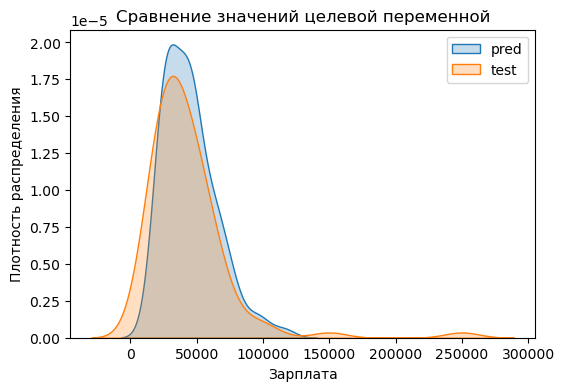

In [309]:
ig, ax_kde = plt.subplots(figsize=(6,4))

sns.kdeplot(result, label='pred', shade=True, fill=True)
sns.kdeplot(y_test, label='test', shade=True, fill=True)
ax_kde.set(xlabel='Зарплата',
           ylabel='Плотность распределения',
           title = 'Сравнение значений целевой переменной')
plt.legend()

In [310]:
y_test.describe()

count        85.000000
mean      42781.176471
std       31959.626667
min       10000.000000
25%       25000.000000
50%       35000.000000
75%       50000.000000
max      250000.000000
Name: salary, dtype: float64

In [311]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_pred = dummy_regr.predict(X_test)
rmse = mean_squared_error(y_test,result)**0.5
dummy_score  = mean_squared_error(y_test,dummy_pred)**0.5
if dummy_score <= rmse:
    print('Модель хуже заполнения средним')
else: print('Модель лучше заполнения средним')

Модель хуже заполнения средним


- К сожалению у меня не получилось сделать достойную модель( сначала думал что как будто не хватает объектов, но может быть как то неправильно заапсемплил, не помогло:(


- В выбросах много неочивидных классов, например у человека без образования и без опыта работы может быть желаемая зарплата 300000, я думаю что даже опытному hr будет трудно по такому резюме предположить такую зарплату. Но я думаю что из данных можно было выжать больше информации 


- По сути модель неплохая в рамках 2 сигм), так как выбросы и крайние процентили она не предсказывает


- Возможно стоило попробовать catboost или Xgboost, но бустинги любят данные, и мне показалась что линейная модель тут получится лучше.


- Были модели с лучшими результатами, даже с положительным r2, но это все заканчивалось на том что модель пыталась угадать как можно больше объектов в диапазоне одной сигмы и это выглядело на kde как огромная башная внутри распределения y_test


- Так же было много исследований которые не попали в итоговый вид проекта просто что бы его не загрязнять